# Linear and Polynomial Regression

Linear regression deals specifically with numerical values, unlike where logistic regression deals with applying the same numerical process on top of a sigmoid to make a classification.

Sklearn support two different algorithms to perform linear regression: `SGDRegressor` and `LinearRegressor`. `LinearRegressor` follows the closed-form approach to finding the parameters to a model, as explained in ![here](here), while `SGDRegressor` takes a more iterative approach.


## Example with Sklearns `SGDRegressor` (Stochastic Gradient Descent)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)

In [2]:
from sklearn import linear_model


clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X, y)

print(f'intercept: {clf.intercept_} \ncoefficients: {clf.coef_}')

intercept: [0.50243877] 
coefficients: [-0.14683705  0.16149987 -0.35308364  0.10294115  0.31454682]


## Polynomial Regression

We can actually use the basis of a linear regression model to build up a polynomial one when our data is more complex than a straight line. 

### How it Works

The main idea here is to train the weights of a linear model like 

$$z = w_0 + x_1 w_1 + x_2 w_2 + x_3 w_3 + \dots + x_n w_n$$

Which we can also read like:

$$z = w_0^1 + x_1 w_1^1 + x_2 w_2^1 + x_3 w_3^1 + \dots + x_n w_n^1$$

And then just add additional terms in the model to outline the polynomial function we would like to fit. Once we do this, training the model follows the same exact process as before. 

$$z = w_0^{w_{00}} + x_1 w_1^{w_{01}} + x_2 w_2^{w_{02}} + x_3 w_3^{w_{03}} + \dots + x_n w_n^{w_{0n}}$$

Note that in above, I am not include interaction terms between features, which is what sklearn additionally does.

Text(0.5, 1.0, '$x^2 + x + 2$')

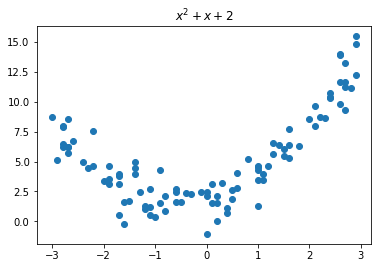

In [3]:
%matplotlib inline
from myutils.datasets import noisy_func
import numpy as np
import matplotlib.pyplot as plt


X, y = noisy_func(lambda x: x**2 + x + 2, np.arange(-3, 3, .1), 100, 1.3)
plt.scatter(X, y)
plt.title(r'$x^2 + x + 2$')

With `PolynomialFeatures` we can generate a power matrix that describes all the possible combinations and interactions a model can have in terms of the variable number of degrees (power) and the number of features (columns).

### Example

Below we will demonstrate two models. One that properly fits to the data, and another one that clearly overfits.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# introduce new features based on polynomial expression
poly2_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly2 = poly2_features.fit_transform(X.reshape(-1, 1))

# now fit all these features into the model and reinterpret
lin_reg_poly2 = LinearRegression()
lin_reg_poly2.fit(X_poly2, y)
print(f'model: {polynomial_function(2, 1)}')
print(f'coeficients: ', lin_reg_poly2.intercept_, lin_reg_poly2.coef_)
print(f'originally noisy function: ', 'x^2 + x + 2')

model: 1+A+A^2
coeficients:  1.855780248523212 [0.         1.0468964  1.03453018]
originally noisy function:  x^2 + x + 2


In [9]:
poly200_features = PolynomialFeatures(degree=200, include_bias=True)
X_poly200 = poly200_features.fit_transform(X.reshape(-1, 1))

lin_reg_poly200 = LinearRegression()
lin_reg_poly200.fit(X_poly200, y)
print(f'model: ... too large for practical viewing!')
print(f'coeficients: ... too large for practical viewing!')
print(f'originally noisy function: ', 'x^2 + x + 2')

model: ... too large for practical viewing!
coeficients: ... too large for practical viewing!
originally noisy function:  x^2 + x + 2


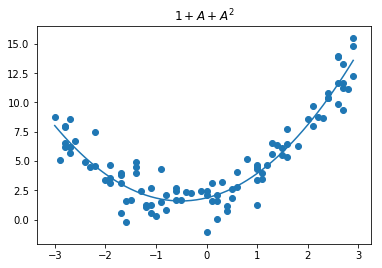

In [25]:
from myutils.draw.math import plt_2d_functions

# plot the first model as a polynomial function
w_0, w_1, w_2 = lin_reg_poly2.intercept_, lin_reg_poly2.coef_[1], lin_reg_poly2.coef_[2]
plt_2d_functions([lambda A: w_0*1 + w_1*A + w_2*A**2], x=np.arange(-3, 3, .1), title=r'$1+A+A^2$')
plt.scatter(X, y)

Not bad!

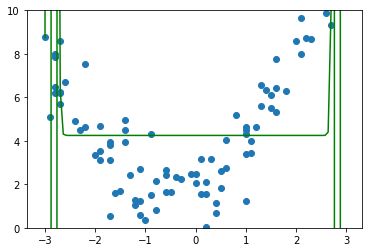

In [28]:
# for poly 200, we'll do a predict plot since the number of coefficients in the model
# are just too exhaustively large
sample_predict = poly200_features.transform(np.linspace(-3, 3, 100).reshape(-1, 1))
y_predict_200poly = lin_reg_poly200.predict(sample_predict)
plt.plot(np.linspace(-3, 3, 100), y_predict_200poly, 'g-', label='300')
plt.ylim((0, 10))
plt.scatter(X, y)

Yikes!